In [12]:
# Scientific libraries
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Graphic libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import japanize_matplotlib
import seaborn as sns
# import holoviews as hv
# from bokeh.io import output_notebook
# output_notebook()
# from bokeh.io import show
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# from ipywidgets import interact # Interactive graph

# Statistical libraries
# import statsmodels.stats as stats
# import statsmodels.stats.multicomp as multi
# import statsmodels.formula.api as smf
# import scikit_posthocs as sp

# Other libraries
# import re
# from datetime import datetime
# import collections

# Creating alias for magic commands
%alias_magic t time

from icecream import ic

import requests
import zipfile
import math
from scipy.stats import poisson
import os.path

rcParams['font.size'] = 12
rcParams['figure.figsize'] = (6, 6)

Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


In [6]:
# 著者サイトからdata3a.csvをダウンロード
response = requests.get('https://kuboweb.github.io/-kubo/stat/iwanamibook/fig/poisson/data3a.csv')
file_name = "data3a.csv"

if not os.path.exists(file_name):
    with open (file_name, 'wb') as f:
        f.write(response.content)
        f.close()
data = pd.read_csv(file_name)

data["d"] = (data["f"] == "T")*1
data

,y,x,f,d
0,6,8.31,C,0
1,6,9.44,C,0
2,6,9.50,C,0
3,12,9.07,C,0
4,10,10.16,C,0
...,...,...,...,...
95,8,9.15,T,1
96,6,8.52,T,1
97,8,10.24,T,1
98,7,10.86,T,1


$$
\begin{align}
  x &\stackrel{\text{def}}{=} \text{体サイズ} \\
  y &\stackrel{\text{def}}{=} \text{種子数} \\
  f &\stackrel{\text{def}}{=} \text{施肥の有無} \\
\end{align}
$$

In [10]:
display(data.describe(include="all"))
display(data.value_counts("f"))

print("variance:")
display(data.var())

print("standard error:")
display(data.sem())

,y,x,f,d
count,100.000000,100.000000,100,100.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,T,NaN
freq,NaN,NaN,50,NaN
mean,7.830000,10.089100,NaN,0.500000
std,2.624881,1.008049,NaN,0.502519
min,2.000000,7.190000,NaN,0.000000
25%,6.000000,9.427500,NaN,0.000000
50%,8.000000,10.155000,NaN,0.500000
75%,10.000000,10.685000,NaN,1.000000


f
T    50
C    50
dtype: int64

variance:


y    6.890000
x    1.016162
d    0.252525
dtype: float64

standard error:


y    0.262488
x    0.100805
d    0.050252
dtype: float64

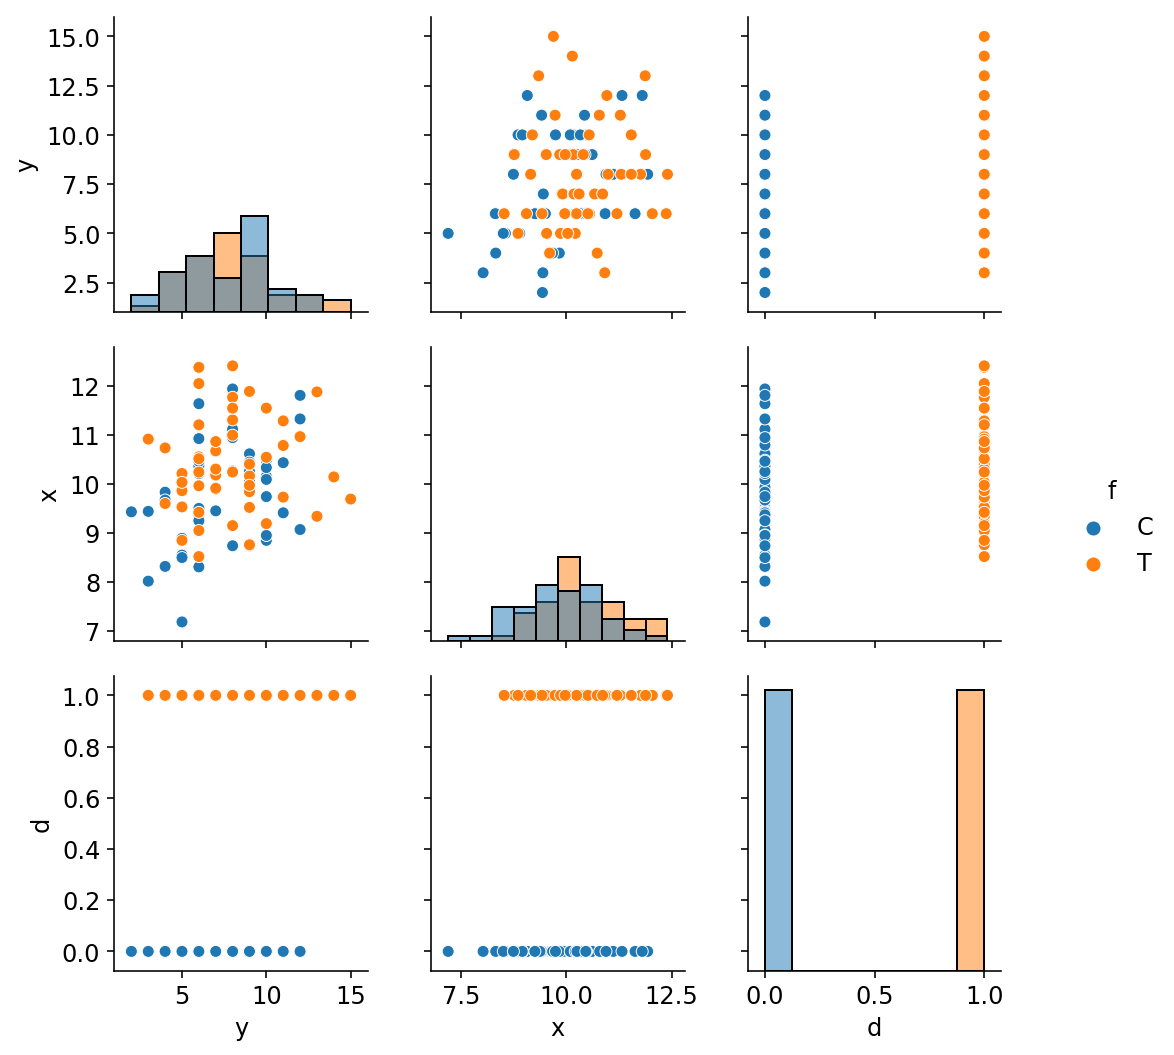

In [15]:
sns.pairplot(data=data,
             hue="f",
             diag_kind="hist")
plt.show()

| Name                           | Definition                |
|:-------------------------------|:--------------------------|
| 逸脱度 ($D$)                   | $-2 \log{L^{*}}$          |
| 最小の逸脱度                   | フルモデルを当てはめた$D$ |
| 残差逸脱度 (Residual Deviance) | $D$ - 最小の$D$           |
| 最大の逸脱度                   | Nullモデルを当てはめた$D$ |
| Null逸脱度 (Null Deviance)     | 最大の$D$ - 最小の$D$     |

![](https://i.gyazo.com/4fd692b63d2efd3130d9dbdf74be8b38.jpg)

In [23]:
hoge = sm.datasets.scotland.load()

display(pd.DataFrame(hoge.exog))

# data.exog = sm.add_constant(data.exog)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/datasets/utils.py:100: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exog = np.column_stack(data[field] for field in exog_name)


,0,1,2,3,4,5,6
0,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0
5,714.0,24.3,107.0,79.0,9555.0,13.8,17350.2
6,920.0,21.2,118.0,72.2,9611.0,13.3,19504.0
7,779.0,20.5,114.0,75.2,9483.0,14.5,15969.5
8,771.0,23.2,102.0,81.1,9483.0,14.2,17887.2
9,724.0,20.5,112.0,80.3,12656.0,13.7,14842.0


In [55]:
params = {}

# in R;
# $ fit <- glm(y ~ x, data=d, family=poisson)
# $ print(fit)

params["x model"] = {}

x_model_fitted = sm.GLM(data["y"], # 応答変数
                        sm.add_constant(data["x"]), # 切片つき説明変数, 複数列も可
                        family=sm.families.Poisson() # 分布の指定
                       ).fit()

display(x_model_fitted.summary())

params["x model"]["b_1"] = x_model_fitted.params["const"]
params["x model"]["b_2"] = x_model_fitted.params["x"]
params["x model"]["log-likelihood"] = x_model_fitted.llf
params["x model"]["D"] = -2*x_model_fitted.llf
params["x model"]["resid.D"] = x_model_fitted.deviance
params["x model"]["null.D"] = x_model_fitted.null_deviance
params["x model"]["AIC"] = x_model_fitted.aic

print("Deviance: {}".format(params["x model"]["D"]))
print("Residual Deviance: {}".format(params["x model"]["resid.D"]))
print("Min. Deviance: {}".format(params["x model"]["D"] \
                                 - params["x model"]["resid.D"]))
print("Max. Deviance: {}".format(params["x model"]["D"] \
                                 - params["x model"]["resid.D"] \
                                 + params["x model"]["null.D"]))

print("AIC: {}".format(x_model_fitted.aic))
# print("BIC: {}".format(x_model_fitted.bic))

print()
mlh_full = sum([poisson.logpmf(y_i, y_i) for y_i in data["y"]])
print("Maximum Likelihood of Full model: {}".format(mlh_full))
print("Min. of Deviance: {}".format(-2*mlh_full))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Tue, 26 Jan 2021   Deviance:                       84.993
Time:                        17:45:18   Pearson chi2:                     83.8
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

Deviance: 470.7725015397216
Residual Deviance: 84.9929964907296
Min. Deviance: 385.779505048992
Max. Deviance: 475.2864426185734
AIC: 474.7725015397216

Maximum Likelihood of Full model: -192.8897525244958
Min. of Deviance: 385.7795050489916


In [56]:
params["null model"] = {}

null_model_fitted = sm.GLM(data["y"], # 応答変数
                        np.ones(len(data)), # Nullの説明変数
                        family=sm.families.Poisson() # 分布の指定
                       ).fit()

display(null_model_fitted.summary())

params["null model"]["b_1"] = null_model_fitted.params["const"]
params["null model"]["log-likelihood"] = null_model_fitted.llf
params["null model"]["D"] = -2*null_model_fitted.llf
params["null model"]["resid.D"] = null_model_fitted.deviance
params["null model"]["null.D"] = null_model_fitted.null_deviance
params["null model"]["AIC"] = null_model_fitted.aic

print("Deviance: {}".format(params["null model"]["D"]))
print("Max. Deviance: {}".format(params["null model"]["D"] \
                                 - params["null model"]["resid.D"] \
                                 + params["null model"]["null.D"]))

print("AIC: {}".format(null_model_fitted.aic))
# print("BIC: {}".format(null_model_fitted.bic))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Tue, 26 Jan 2021   Deviance:                       89.507
Time:                        17:45:20   Pearson chi2:                     87.1
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

Deviance: 475.2864426185736
Max. Deviance: 475.28644261857363
AIC: 477.2864426185736


# 新しいデータセット

- $y$が$x$とは無関係なデータを考える

,y,x
count,100.00000,100.000000
mean,7.45000,9.703490
std,2.99621,2.961424
min,1.00000,2.328349
25%,5.00000,7.579111
50%,7.00000,9.884056
75%,9.00000,11.737084
max,15.00000,17.189254


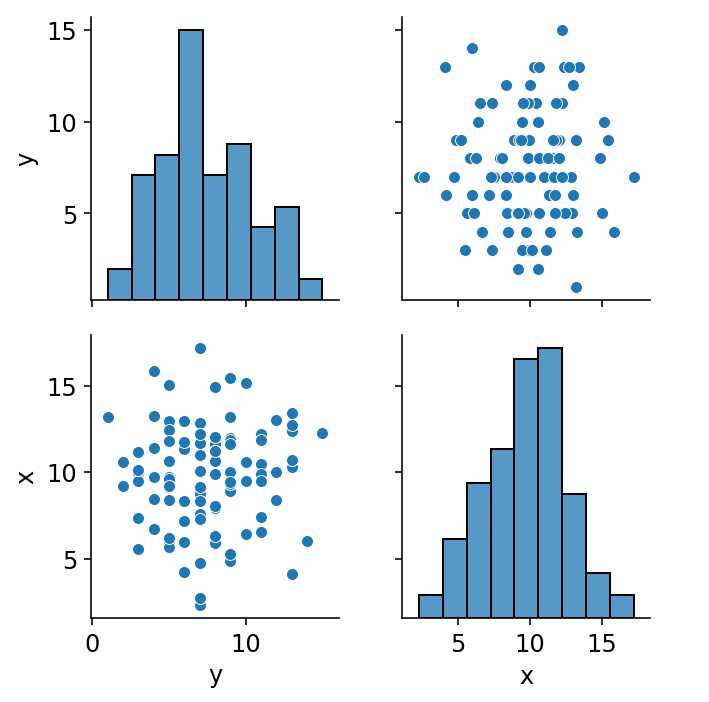

In [87]:
np.random.seed(10)
data_rand = np.array([np.random.poisson(data["y"].mean(),
                                        100),
                      np.random.normal(data["x"].mean(),
                                       np.sqrt(data["x"].mean()),
                                       100)]).T
data_rand = pd.DataFrame(data_rand,
                         columns=["y", "x"])

display(data_rand.describe())

sns.pairplot(data_rand)

In [90]:
# X factor model
prms_rnd = {}

# in R;
# $ fit <- glm(y ~ x, data=data_rand, family=poisson)
# $ print(fit)

prms_rnd["x model"] = {}

x_model_fitted = sm.GLM(data_rand["y"], # 応答変数
                        sm.add_constant(data_rand["x"]),
                        family=sm.families.Poisson() # 分布の指定
                       ).fit()

display(x_model_fitted.summary())

prms_rnd["x model"]["b_1"] = x_model_fitted.params["const"]
prms_rnd["x model"]["b_2"] = x_model_fitted.params["x"]
prms_rnd["x model"]["log-likelihood"] = x_model_fitted.llf
prms_rnd["x model"]["D"] = -2*x_model_fitted.llf
prms_rnd["x model"]["resid.D"] = x_model_fitted.deviance
prms_rnd["x model"]["null.D"] = x_model_fitted.null_deviance
prms_rnd["x model"]["AIC"] = x_model_fitted.aic

# null factor model
prms_rnd["null model"] = {}

null_model_fitted = sm.GLM(data_rand["y"], # 応答変数
                        np.ones(len(data_rand)), # Nullの説明変数
                        family=sm.families.Poisson() # 分布の指定
                       ).fit()

display(null_model_fitted.summary())

prms_rnd["null model"]["b_1"] = null_model_fitted.params["const"]
prms_rnd["null model"]["log-likelihood"] = null_model_fitted.llf
prms_rnd["null model"]["D"] = -2*null_model_fitted.llf
prms_rnd["null model"]["resid.D"] = null_model_fitted.deviance
prms_rnd["null model"]["null.D"] = null_model_fitted.null_deviance
prms_rnd["null model"]["AIC"] = null_model_fitted.aic

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -250.50
Date:                Tue, 26 Jan 2021   Deviance:                       123.07
Time:                        18:07:08   Pearson chi2:                     119.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9479      0.127     15.355      0.000       1.699       2.197
x              0.0062      0.012      0.498      0.619      -0.018       0.031
==============================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -250.63
Date:                Tue, 26 Jan 2021   Deviance:                       123.32
Time:                        18:07:08   Pearson chi2:                     119.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0082      0.037     54.814      0.000       1.936       2.080
==============================================================================
"""

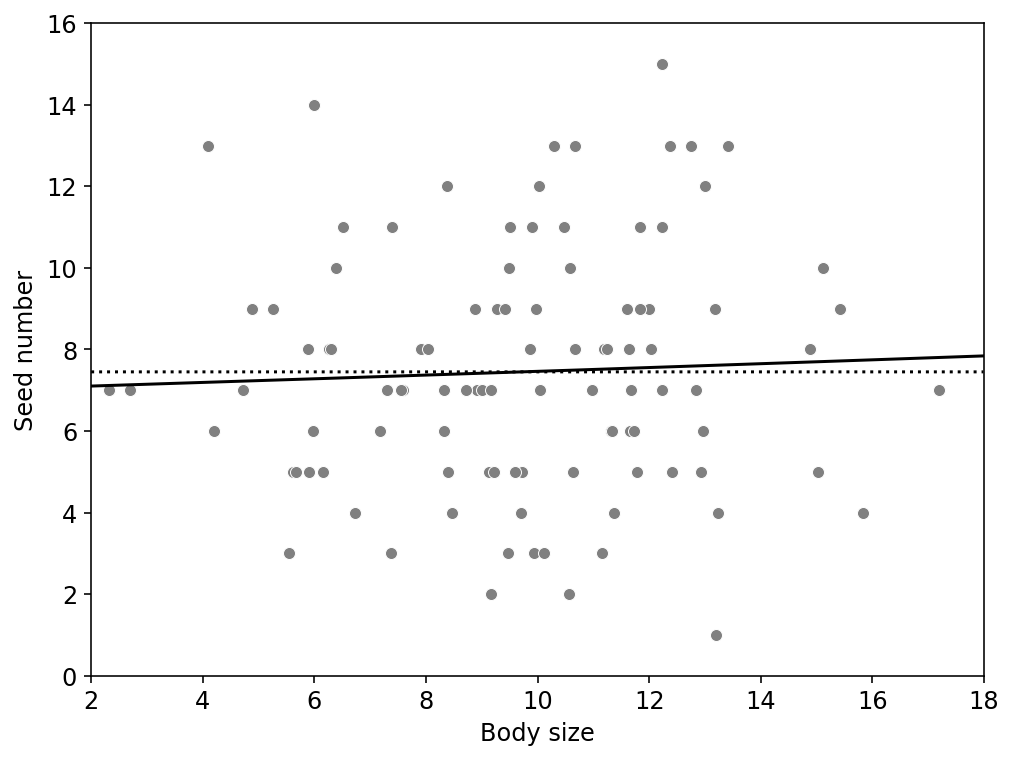

505.0038905633119
503.251739943296


In [96]:
def body_seed_func(x, b1, b2):
    return np.exp(b1 + b2*x)

# Set parameters
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (8, 6)

xlim = (math.floor(data_rand["x"].min()),
        math.ceil(data_rand["x"].max()))
ylim = (0,
        math.ceil(data_rand["y"].max()))

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(xlim[0], xlim[1], 0.01)
y = body_seed_func(x,
                   prms_rnd["x model"]["b_1"],
                   prms_rnd["x model"]["b_2"])
y_null = body_seed_func(x,
                        prms_rnd["null model"]["b_1"],
                        0)

ax.plot(x,
        y,
        'k-')

ax.plot(x,
        y_null,
        'k:')

sns.scatterplot(data=data_rand,
                x="x",
                y="y",
                color="grey",
                palette="Greys",
               )
# X-axis Settings
ax.set_xlim(xlim[0], xlim[1])
ax.set_xlabel('Body size')

# Y-axis Settings
ax.set_ylim(ylim[0], ylim[1] + 1)
ax.set_ylabel('Seed number')

plt.show()

print(prms_rnd["x model"]["AIC"])
print(prms_rnd["null model"]["AIC"])